In [19]:
import pandas as pd
import numpy as np 
import sqlite3
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import scipy as sp
import sqlite3
import re
from datetime import datetime

In [20]:
conn = sqlite3.connect("/Users/jackmackle/py_work/jacksbot/storage/storage.db")
df = pd.read_sql_query("SELECT * FROM tweets", conn)
conn.close()

# VADER - No Cleaning

In [21]:
sid = SentimentIntensityAnalyzer()

In [36]:
tw_text_list = df["full_text"].tolist()
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [38]:
df["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

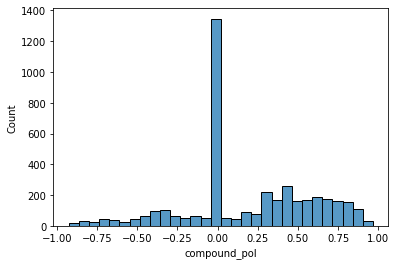

In [39]:
sns.histplot(data=df, x="compound_pol")

# VADER - Cleaning

In [22]:
df_clean = df

In [23]:
tw_text_list = df_clean["full_text"].tolist()

def remove_handles(text):
    r = re.findall("@[\w]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_handles, tw_text_list))

def remove_links(text):
    r = re.findall("https?://[A-Za-z0-9./]*", text)
    for i in r:
        text = re.sub(i, "", text)
        
    return text

tw_text_list = list(map(remove_links, tw_text_list))

In [24]:
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

In [25]:
df_clean["compound_pol"] = compound

<AxesSubplot:xlabel='compound_pol', ylabel='Count'>

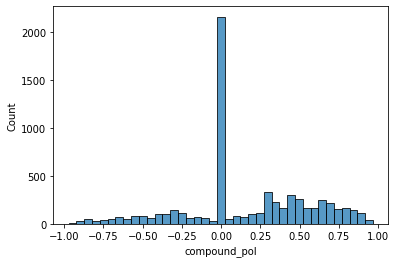

In [26]:
sns.histplot(data=df_clean, x="compound_pol")

In [27]:
df_clean.columns

Index(['tweet_id', 'created_at', 'in_reply_to_status', 'full_text', 'verified',
       'retweet_count', 'user_id', 'user_name', 'user_followers_coubt',
       'compound_pol'],
      dtype='object')

In [28]:
df_cbs = df_clean.groupby("user_name", as_index=False)["compound_pol"].mean()
df_cbs.sort_values(by="compound_pol", ascending=False)

,user_name,compound_pol
880,WallStreetU3O8,0.9434
697,SamTheCarpetMan,0.9401
661,ReinhardAustrup,0.9246
1184,mariarowen_1120,0.9245
750,Strathmoreplus,0.9175
...,...,...
284,EriCheri3,-0.9112
1310,saaedsabzian,-0.9136
1033,drizham,-0.9186
700,Sarah4Durham,-0.9222


In [29]:
#pd.to_datetime(pd.Series(['2022-02-27 19:15:57+00:00']), format="%m/%d/%Y")

strip_date = list(map(lambda x: x.split()[0], df_clean["created_at"].to_list()))
df_clean["stripdate"] = strip_date

In [30]:
df_clean[["stripdate", "compound_pol"]].groupby("stripdate", as_index=False).agg(['count','mean']).reset_index()

stripdate compound_pol          
                      count      mean
0   2022-02-22           61  0.176889
1   2022-02-23          336  0.204645
2   2022-02-24          490  0.147176
3   2022-02-25          520  0.202389
4   2022-02-26          279  0.225790
5   2022-02-27          287  0.142606
6   2022-02-28          573  0.147505
7   2022-03-01          600  0.211371
8   2022-03-02          637  0.159918
9   2022-03-03          530  0.197516
10  2022-03-04          814  0.027661
11  2022-03-05          317  0.183103
12  2022-03-06          266  0.157923
13  2022-03-07          636  0.168501
14  2022-03-08          225  0.158241

<AxesSubplot:xlabel='stripdate', ylabel='compound_pol'>

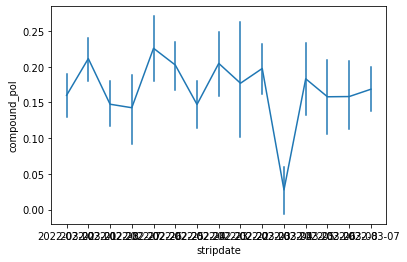

In [31]:
sns.lineplot(data=df_clean,
            x="stripdate",
            y="compound_pol",
            err_style="bars")